In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Input,UpSampling2D,Reshape

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#mnist 데이터 불러 옴
(x_train,_),(x_test,_) = mnist.load_data()

#데이터의 shape 변환 및 정규화
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255

In [5]:
# 생성자 모듈 생성
autoencoder=Sequential()
#인코딩 부분 설계 conv,maxpooling 2번 conv-> 7*7*8
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))

#디코딩 부분 설계 0> 28*28*1
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())#14*14
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())#16*16*8
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(UpSampling2D())#28*28 *16
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',activation='sigmoid'))
autoencoder.summary() 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

In [9]:
#컴파일 및 실행
autoencoder.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
autoencoder.fit(x_train, x_train, epochs=2, batch_size=128,validation_data=(x_test, x_test))


    

Epoch 1/2
469/469 [==============================] - 34s 70ms/step - loss: 0.0925 - accuracy: 0.8133 - val_loss: 0.0908 - val_accuracy: 0.8125
Epoch 2/2
469/469 [==============================] - 33s 70ms/step - loss: 0.0918 - accuracy: 0.8134 - val_loss: 0.0907 - val_accuracy: 0.8126


313/313 [==============================] - 3s 9ms/step


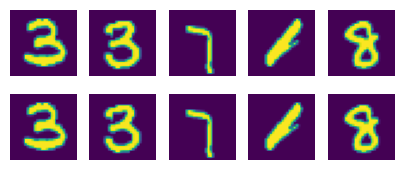

In [14]:
#학습된 결과 출력
pred_test=np.random.randint(x_test.shape[0], size=5) #test idx  랜덤으로 5개 선정

pred_imgs=autoencoder.predict(x_test) #auto인코더로 기존의 이미지의 특성을 살려 새로운 이미지 생성
test_idx=np.random.randint(x_test.shape[0], size=5)
plt.figure(figsize=(7,2))
for i , image_idx in enumerate(test_idx):
    ax=plt.subplot(2,7,i+1)
    plt.imshow(x_test[image_idx].reshape(28,28))
    ax.axis('off')
    
    ax=plt.subplot(2,7,i+7+1)
    plt.imshow(pred_imgs[image_idx].reshape(28,28))
    plt.imshow(x_test[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()
               